# Sheet 5
by Michaela and Elias

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Logic_map:
    
    def __init__(self, func):
        self.func = func

    def calculate_trajectory(self,x0,r,steps):
        trajectory = [x0]
        xn = x0
        for i in range(steps-1):
            xnn = self.func(xn,r)
            xn = xnn
            trajectory.append(xn)
        return np.array(trajectory)
        

        
    def plot_cobweb(self, x0, r, steps, color, label):
        
        # Calculate trajectory
        x = self.calculate_trajectory(x0,r,steps)
        plt.scatter(x[0], x[1], color=color, label=label)
        # Plot cobweb
        for i in range(len(x) - 2):
            plt.scatter(x[i], x[i+1], color=color)
            plt.plot([x[i], x[i+1]], [x[i+1], x[i+1]], color=color)
            plt.plot([x[i+1], x[i+1]], [x[i+1], x[i+2]], color=color)
        plt.scatter(x[-2], x[-1], color=color)
        
    
    def calculate_trajectory_end_points(self, list_r, steps):
        
        # Calculate trajectory end points
        trajectory_ends = []
        for r in list_r:
            x0 = np.random.rand(1000)
            trajectory_ends.append(self.calculate_trajectory(x0, r, steps)[-1])
        
        return trajectory_ends
        
    def plot_trajectory_end_points(self, rs, trajectory_ends):
        
        # Reshape array of rs
        rs = np.repeat(rs, 1000).reshape(-1, 1000)
        
        plt.scatter(rs, trajectory_ends, s=0.5)
        plt.xlabel('r')
        plt.ylabel(r'$x_{100}$')

In [3]:
def log_map(x, r):
    return r*x*(1-x)

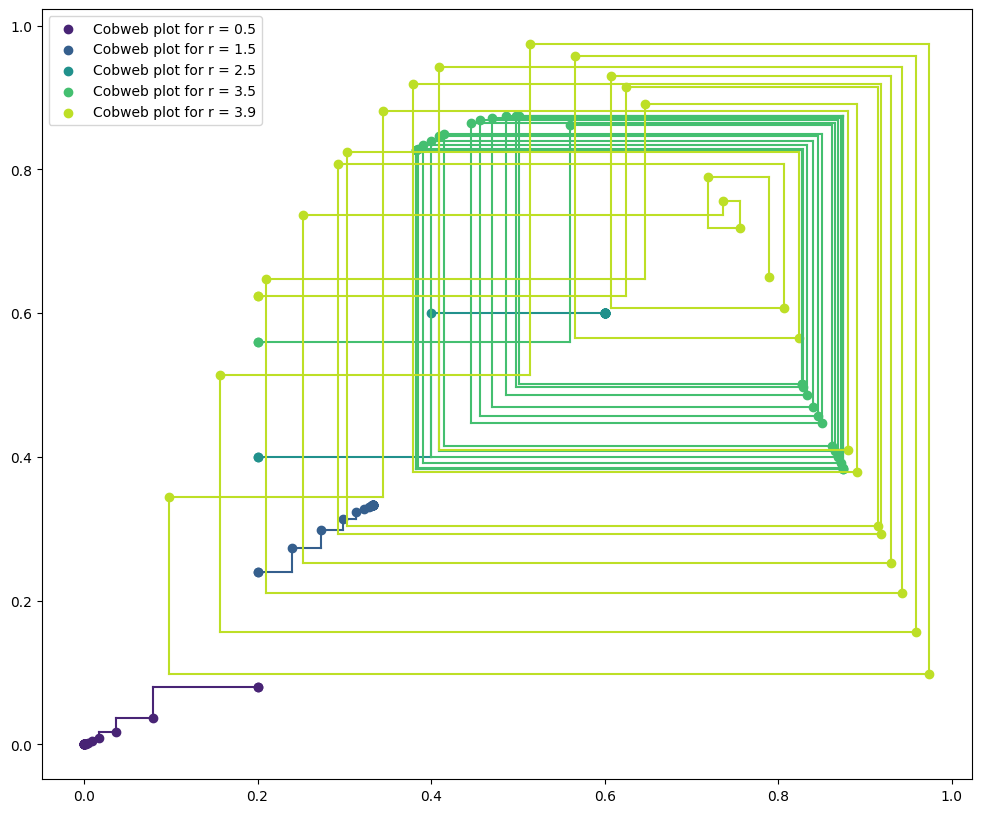

In [4]:
lmap = Logic_map(log_map)

# Plot cobweb for different rs
rs = [0.5, 1.5, 2.5, 3.5, 3.9]
cmap = plt.get_cmap('viridis')
colors = [0.1, 0.3, 0.5, 0.7, 0.9]

plt.figure(figsize=(12, 10))
for i, r in enumerate(rs):
    lmap.plot_cobweb(0.2, r, 30, color=cmap(colors[i]), label=f'Cobweb plot for r = {r}')

plt.legend()
plt.show()

In [5]:
# Compute trajectory ends for r-array
rs = np.linspace(0.001, 3.999, 399)
trajectory_ends = lmap.calculate_trajectory_end_points(rs, 100)

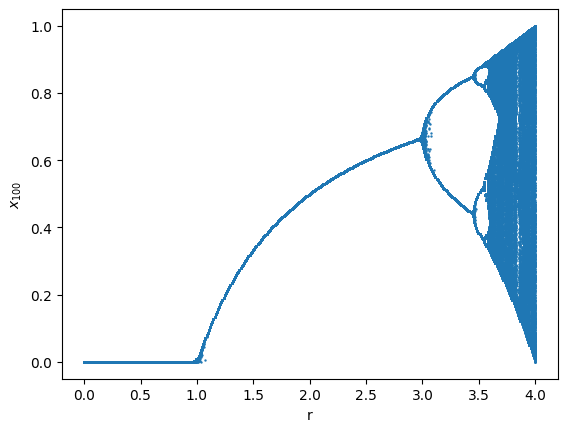

In [6]:
# Plot Trajectory ends for r-array
lmap.plot_trajectory_end_points(rs, trajectory_ends)

In [7]:
# Calculate trajectory ends for new r-array
rs = np.linspace(3.44500, 3.57000, 1250)
trajectory_ends = lmap.calculate_trajectory_end_points(rs, 100)

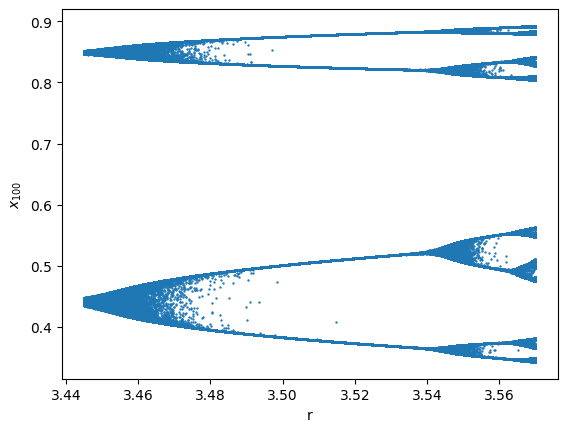

In [8]:
# Plot trajectory ends for new r-array
lmap.plot_trajectory_end_points(rs, trajectory_ends)

In [9]:
from sklearn.neighbors import KernelDensity
from scipy.signal import find_peaks

In [ ]:
mask = rs > 3.44
r_masked = rs[mask]
x_masked = np.array(trajectory_ends)[mask, :]

maxima_ls = []

for i, x in enumerate(x_masked):
    # Reshape for KDE
    x_d = np.linspace(min(x) - 1, max(x) + 1, 1000)[:, np.newaxis]
    kde = KernelDensity(kernel='gaussian', bandwidth=0.025).fit(x[:, np.newaxis])
    log_dens = kde.score_samples(x_d)

    # Find maxima
    density_values = np.exp(log_dens)
    peaks, _ = find_peaks(density_values)
    """
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(x_d[:, 0], density_values, label='KDE')
    plt.scatter(x_d[peaks], density_values[peaks], color='red', zorder=5, label='Maxima')
    plt.title('Kernel Density Estimation with Maxima')
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.legend()
    plt.show()
    """
    # Number of maxima
    num_maxima = len(peaks)
    maxima_ls.append(num_maxima)

In [ ]:
plt.plot(r_masked, maxima_ls)